# 边缘检测-图像直接卷积实现Sobel检测

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.signal as signal

In [2]:
src = cv2.imread('../datas/f2.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
rgb_f = rgb.astype(np.float32)

In [23]:
def convolution_sobel(src,thresh = 120):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    sobel_x = np.array([
        [1,0,-1],
        [2,0,-2],
        [1,0,-1]
    ])
    sobel_y = np.array([
        [1,2,1],
        [0,0,0],
        [-1,-2,-1]
    ])
    
    # 卷积计算
#     grad_x = cv2.filter2D(srcf,-1,sobel_x)
#     grad_y = cv2.filter2D(srcf,-1,sobel_y)
    grad_x = signal.convolve2d(srcf,sobel_x,boundary='symm',mode='same')
    grad_y = signal.convolve2d(srcf,sobel_y,boundary='symm',mode='same')
    
    # 计算梯度模长
    grad_mag = np.sqrt(grad_x ** 2 + grad_y ** 2)
    # 二值化
    idx = (grad_mag >= thresh)
    dst[idx] = 255
    dst[~idx] = 0
    return np.uint8(dst),grad_x,grad_y

In [27]:
dst,grad_x,grad_y = convolution_sobel(gray,thresh=100)

Text(0.5,1,'Gradient Y')

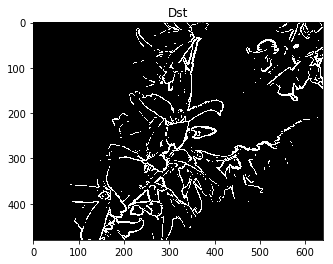

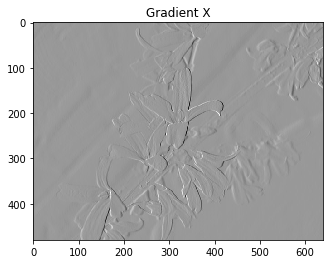

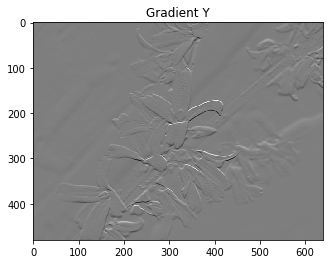

In [28]:
plt.figure()
plt.imshow(dst,'gray')
plt.title('Dst')
plt.figure()
plt.imshow(grad_x,'gray')
plt.title('Gradient X')
plt.figure()
plt.imshow(grad_y,'gray')
plt.title('Gradient Y')